In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [79]:
## 데이터 불러오기
DATA_FILE = '../data/smart_quality_inspection_dataset.csv'
dataDF = pd.read_csv(DATA_FILE)
df = dataDF.copy()
df

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
0,0.046846,0.747276,-0.115297,-0.920363,-1.195644,-0.953782,-1.143734,2.891212,-0.877729,-0.038431,63.621048,0.705596,52.986256,Surface Crack
1,-0.086770,1.413315,0.429374,0.424495,0.174386,0.275093,0.322255,-0.627408,-0.917360,0.058642,58.142729,3.463638,49.447204,No Fault
2,-0.536923,0.184367,-1.079265,-1.473758,-1.279324,-0.073878,-1.615569,1.949660,1.952232,0.885493,57.099583,5.502285,23.220863,No Fault
3,-0.369409,-0.483601,0.296536,0.596621,0.296258,-1.310473,-0.189909,0.533266,-2.361538,-1.105311,70.307374,6.750232,44.256296,Overheating
4,0.525870,-0.312140,-0.311123,1.108442,-0.053811,-0.473454,-0.308574,-0.275646,-0.834540,-0.222531,59.947956,5.152318,36.517987,No Fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,0.147408,-0.121048,-0.275545,-0.383891,1.133566,0.282000,-1.520501,0.132910,1.517748,-0.461473,49.521390,15.688499,39.238204,Abnormal Vibration
1850,-0.384747,0.631838,-0.855179,-1.180763,-1.564962,0.679784,0.869498,-0.585282,-1.154596,0.870035,56.235505,5.870908,37.967497,No Fault
1851,-0.125707,-2.006921,0.371849,0.291351,1.388480,0.839362,0.895828,-0.877541,-1.352855,0.512570,60.733729,10.721070,33.766704,Abnormal Vibration
1852,0.018464,0.646381,0.125657,1.444634,-0.431179,0.041910,-0.633165,-0.874990,1.324975,-0.113348,55.918872,5.402331,43.694638,No Fault


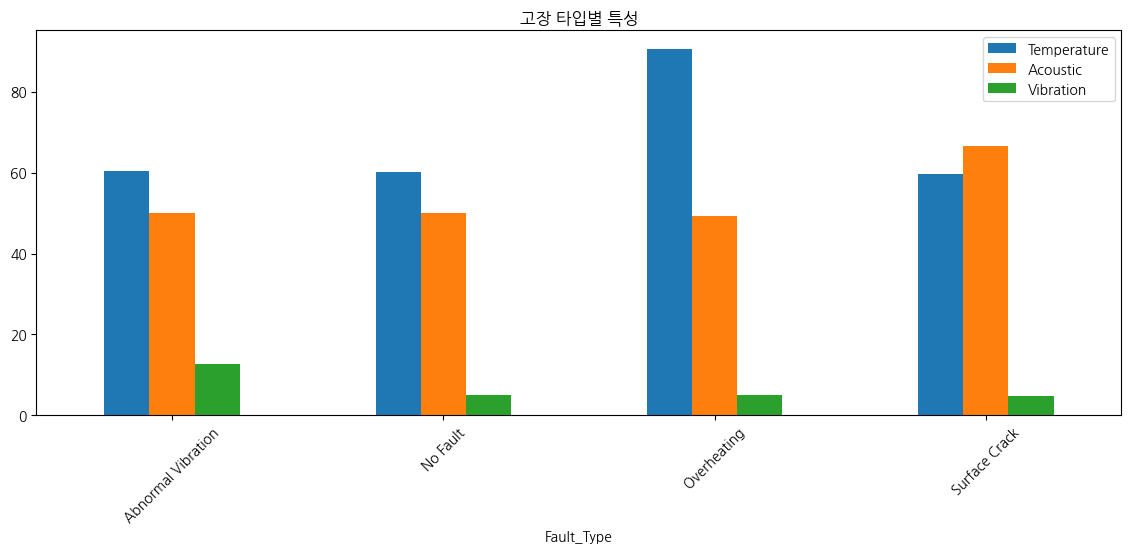

In [80]:
# 고장 타입별 특성 확인
df1 = df.groupby("Fault_Type")[['Temperature','Acoustic','Vibration']].mean()
df1.plot(kind='bar',figsize=(14,5))
plt.title('고장 타입별 특성')
plt.xticks(rotation=45)
plt.show()

# 각 고장의 특징 확인 가능 아래에 서술

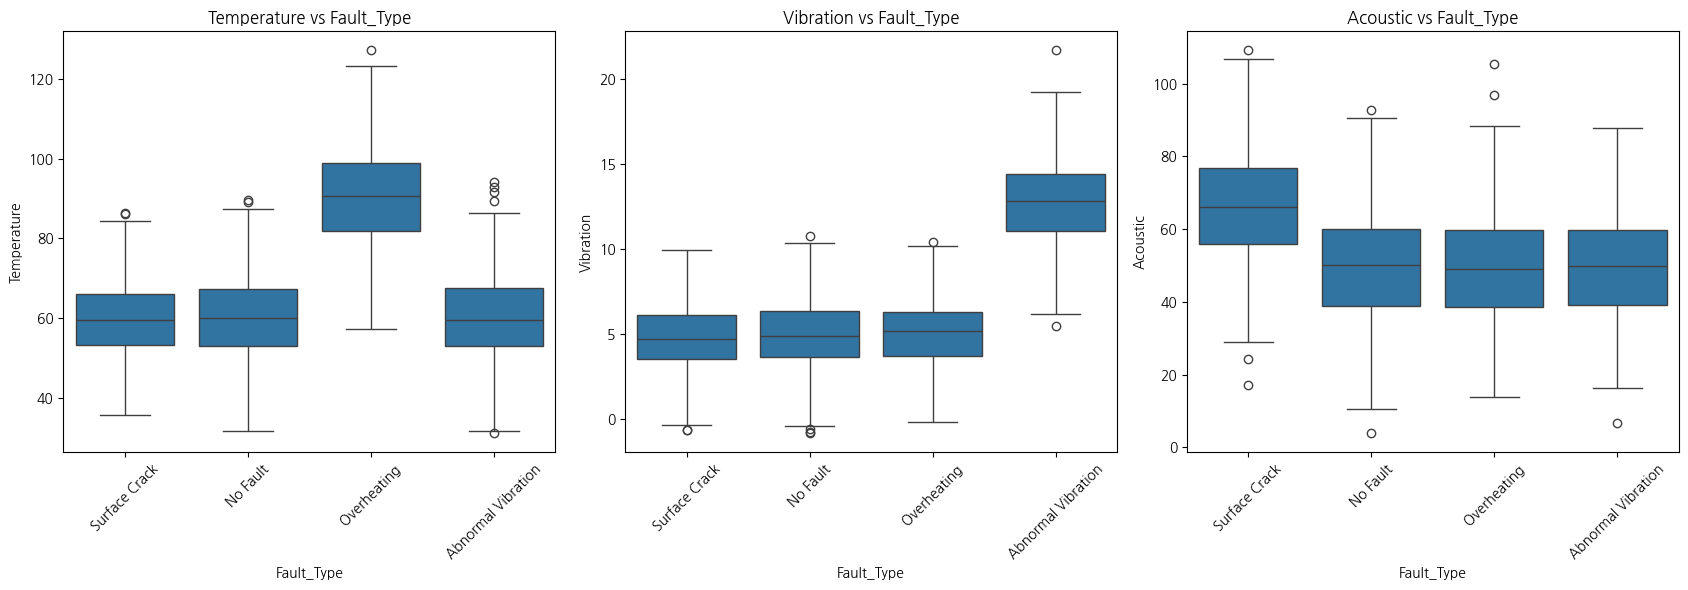

In [81]:

cols = ['Temperature','Vibration','Acoustic']
plt.figure(figsize=(17, 6))
   # 가로로 길게

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Fault_Type', y=col, data=df,)
    plt.title(f'{col} vs Fault_Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 박스 플롯으로 확인한 결과 바 플롯과 같은 

## ===================================
## 고장 별 특징
## ===================================
## 오버히팅 : 온도가 높음
## 진동 : 진동이 높음
## 표면 크랙 : 소음이 큼
## ===================================

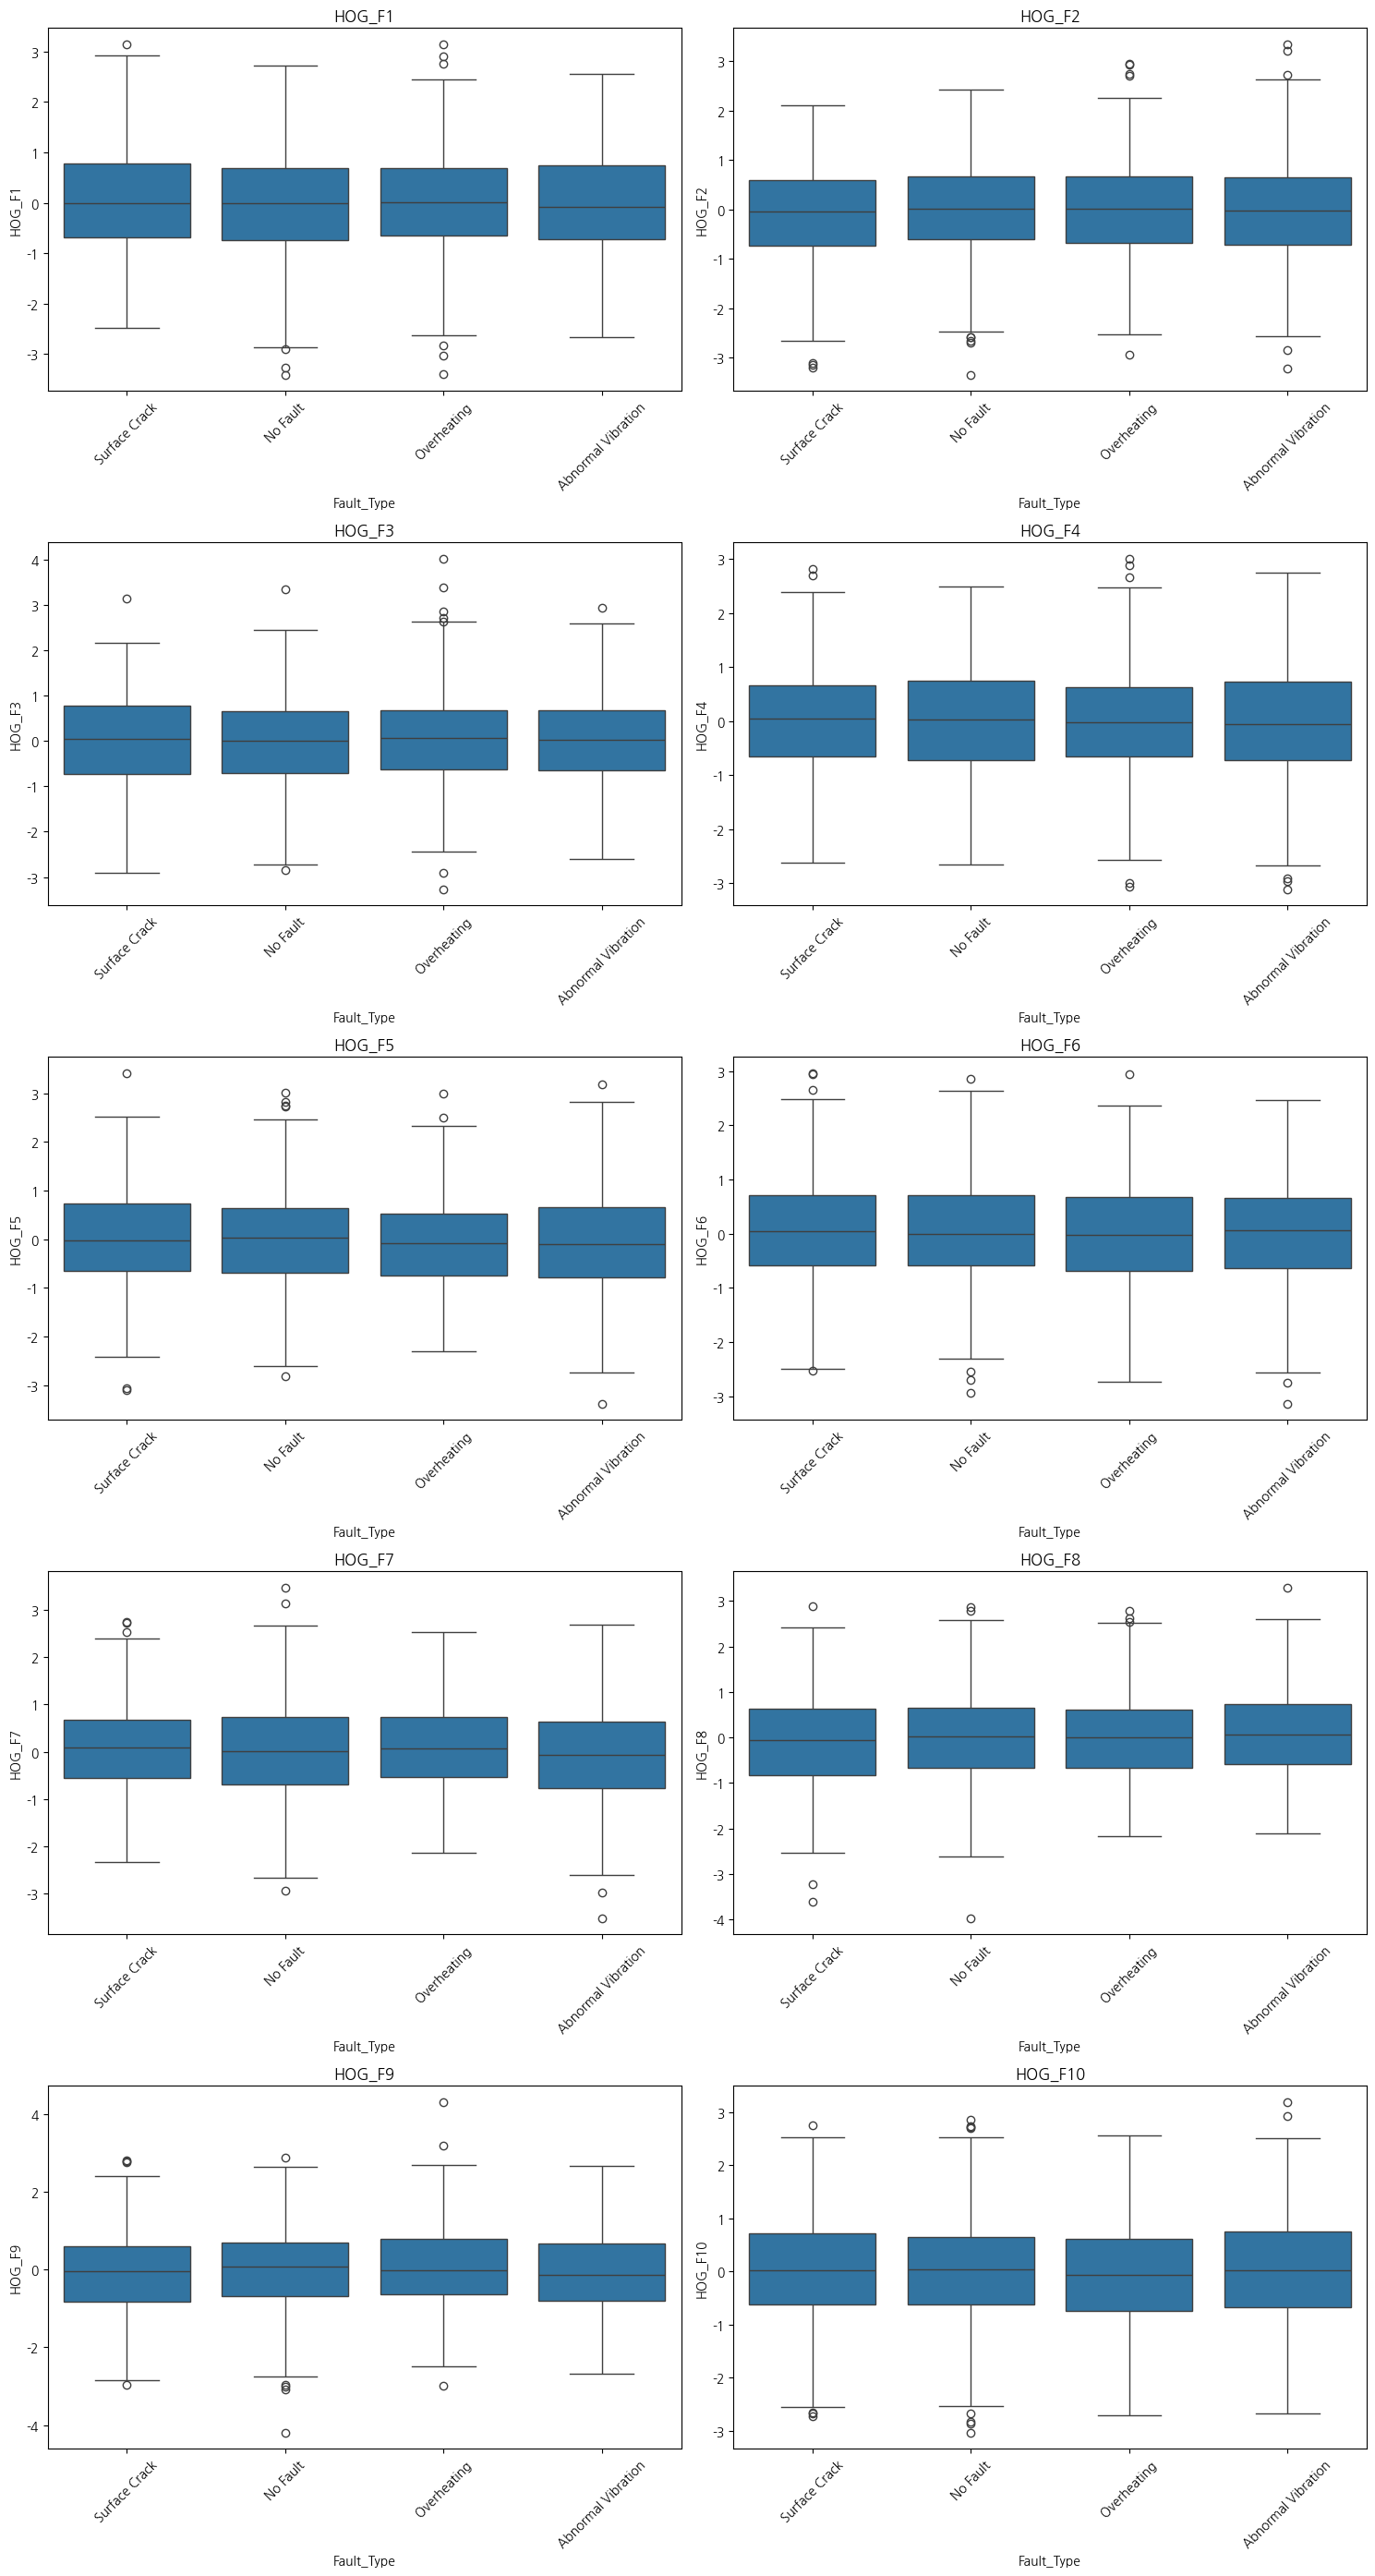

In [82]:
# hog 별 분석


hog_cols = [f'HOG_F{i}' for i in range(1, 11)]

plt.figure(figsize=(15, 28))

for i, col in enumerate(hog_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Fault_Type', y=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
## 큰 박스플롯 큰 특징 보이지 않음


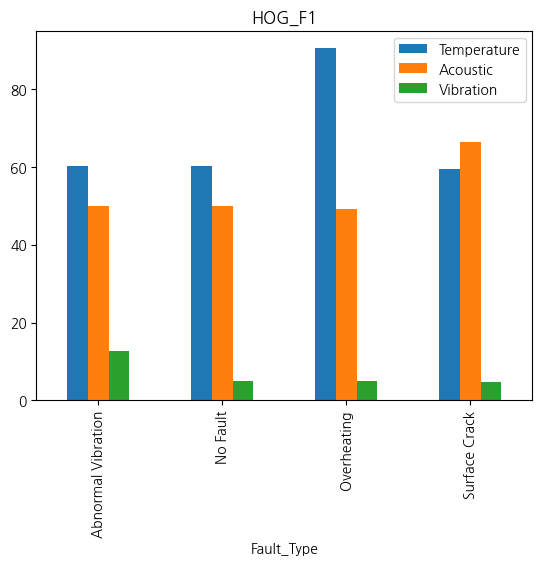

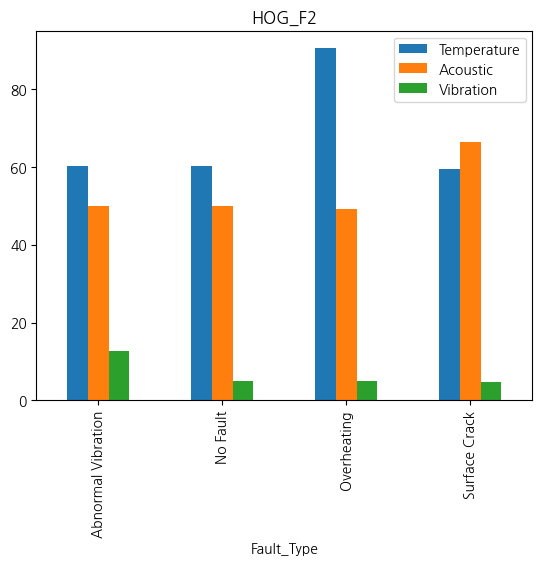

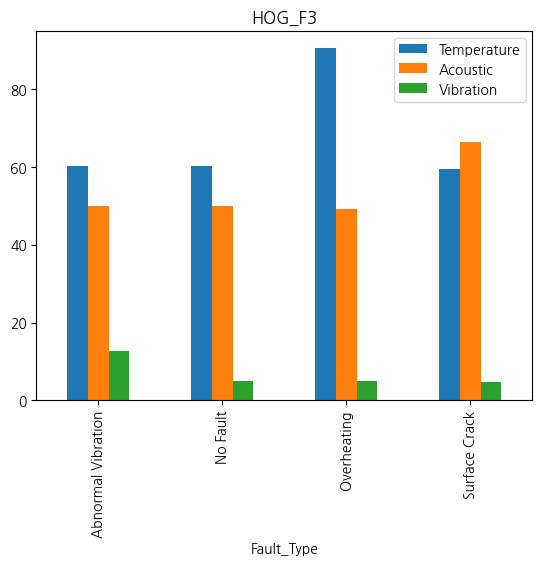

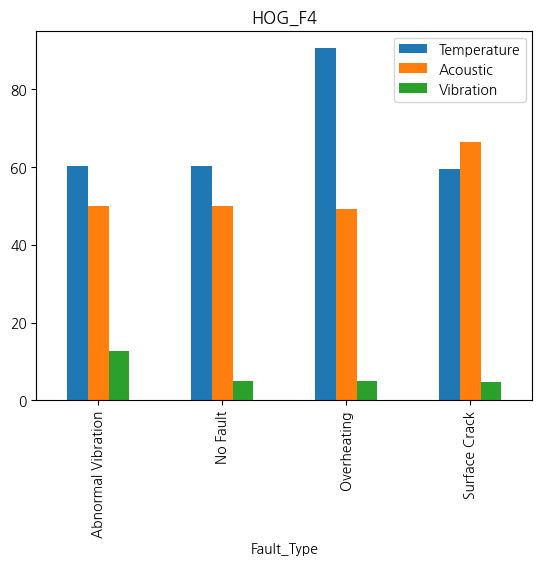

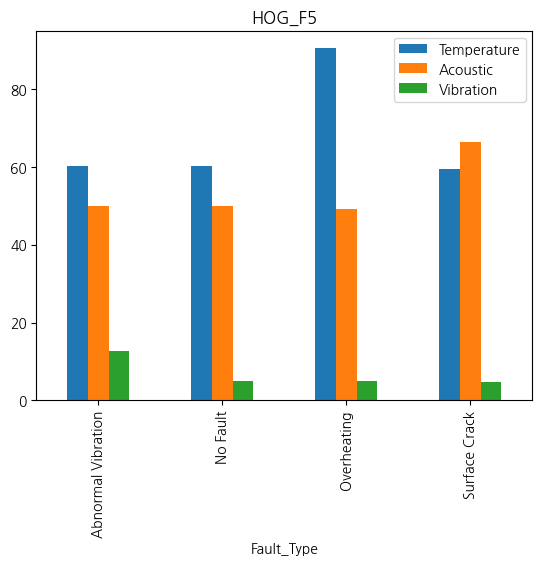

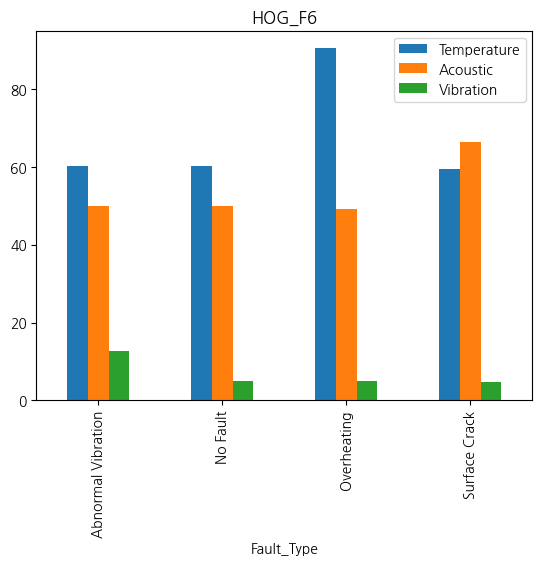

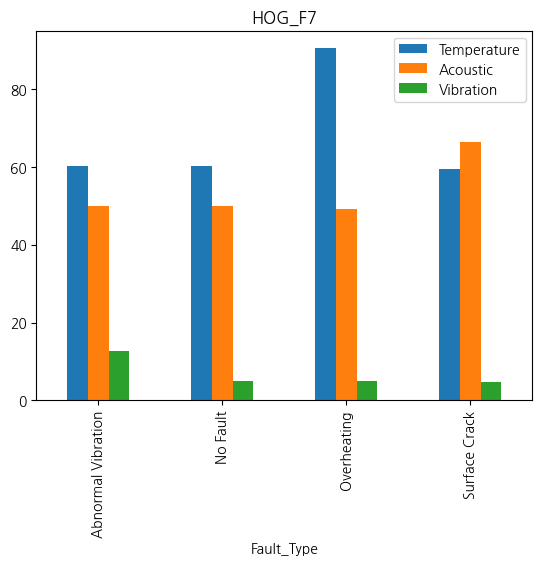

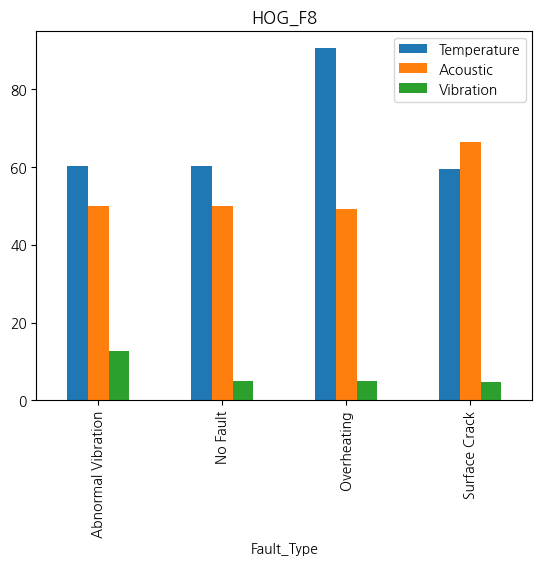

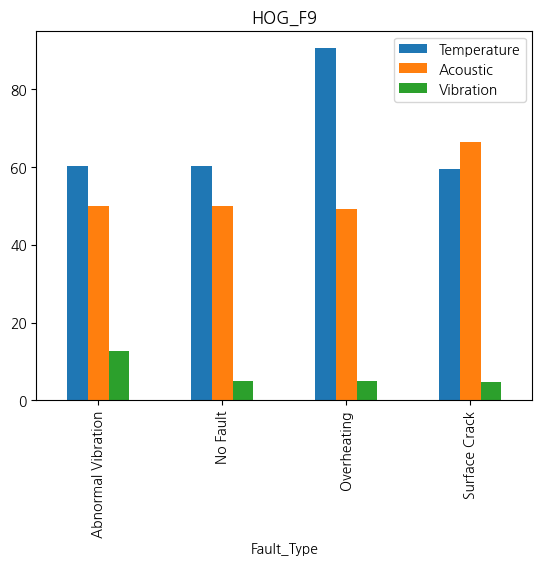

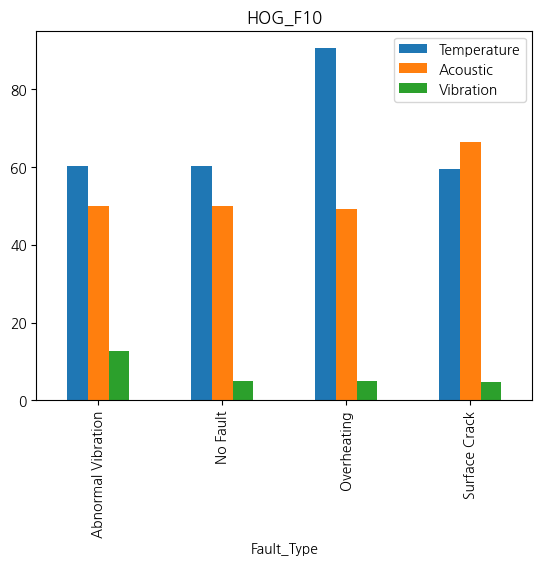

In [83]:
## 평균 값을 활용한 바 플롯 역시 각 고장의 특성을 제외하면 큰 특징이 보이지 않음
for i in range(1,11):
    df2 = df.groupby("Fault_Type")[f'HOG_F{i}'].mean()
    df1.plot(kind='bar')
    plt.title(f'HOG_F{i}')
    plt.show()


In [ ]:
## 상관계수 역시 0에 가까움
hog_cols = [f'HOG_F{i}' for i in range(1, 11)]

corr = df[hog_cols].corr()
corr 


,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10
HOG_F1,1.000000,-0.038836,0.004246,-0.021759,0.003884,-0.014260,-0.005098,-0.005788,-0.011445,-0.028142
HOG_F2,-0.038836,1.000000,0.013869,-0.017183,-0.011517,-0.018348,-0.039708,-0.017957,0.010436,-0.002198
HOG_F3,0.004246,0.013869,1.000000,-0.015813,-0.005829,-0.034896,0.037164,-0.009630,-0.000999,-0.045952
HOG_F4,-0.021759,-0.017183,-0.015813,1.000000,0.030271,0.003491,-0.019981,0.027023,-0.032740,0.018048
HOG_F5,0.003884,-0.011517,-0.005829,0.030271,1.000000,0.011673,0.033427,-0.043615,0.005805,0.040237
HOG_F6,-0.014260,-0.018348,-0.034896,0.003491,0.011673,1.000000,0.048275,0.006018,0.018915,0.021683
HOG_F7,-0.005098,-0.039708,0.037164,-0.019981,0.033427,0.048275,1.000000,0.043931,-0.016227,-0.021133
HOG_F8,-0.005788,-0.017957,-0.009630,0.027023,-0.043615,0.006018,0.043931,1.000000,-0.010376,-0.004397
HOG_F9,-0.011445,0.010436,-0.000999,-0.032740,0.005805,0.018915,-0.016227,-0.010376,1.000000,-0.009381
HOG_F10,-0.028142,-0.002198,-0.045952,0.018048,0.040237,0.021683,-0.021133,-0.004397,-0.009381,1.000000


<Axes: >

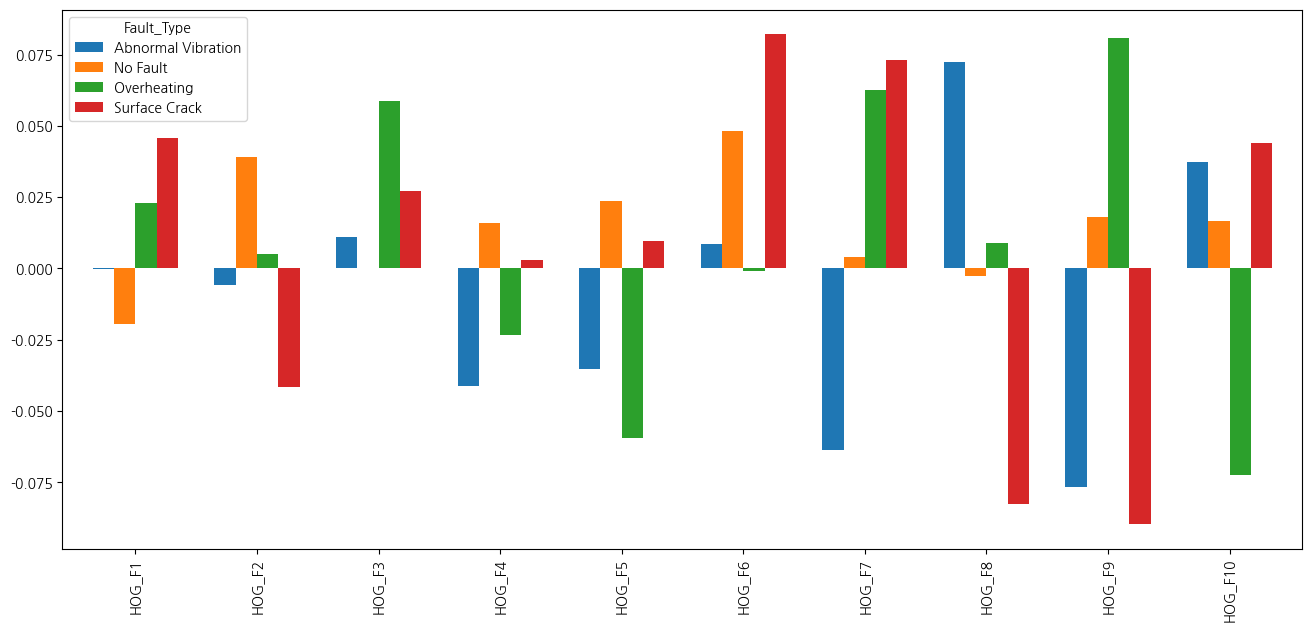

In [ ]:
# 그렇다면 각 고장별로 hog를 4가지(비고장, 크랙, 고온, 진동)고장으로 나눠 평균을 내면 각 부위별 특징이 보일것이라 예상

df1 = df.groupby('Fault_Type')[hog_cols].mean()
df1.T.plot(kind='bar',figsize=(16,7),width=0.7)

# 정상 수치와 비교하기 불편

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10
Fault_Type,,,,,,,,,,
Abnormal Vibration,0.019242,-0.044605,0.010600,-0.057141,-0.058971,-0.039552,-0.067471,0.075226,-0.094514,0.020726
Overheating,0.042462,-0.033950,0.058434,-0.039364,-0.083275,-0.048914,0.058739,0.011668,0.062737,-0.089283
Surface Crack,0.064978,-0.080389,0.026949,-0.012904,-0.014046,0.033945,0.069409,-0.079905,-0.107663,0.027137


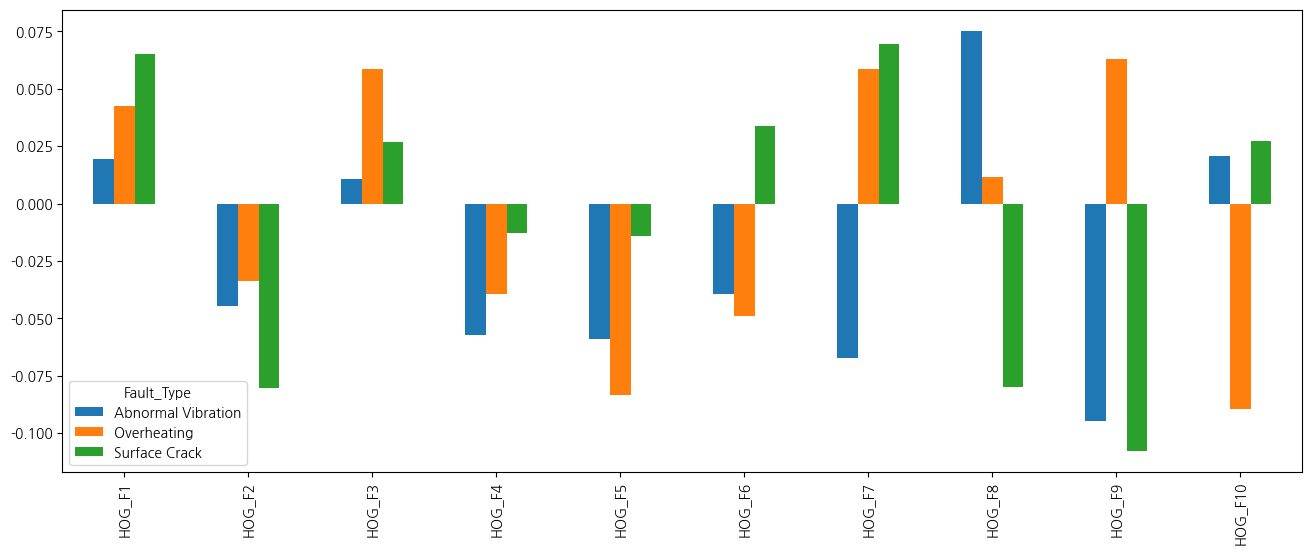

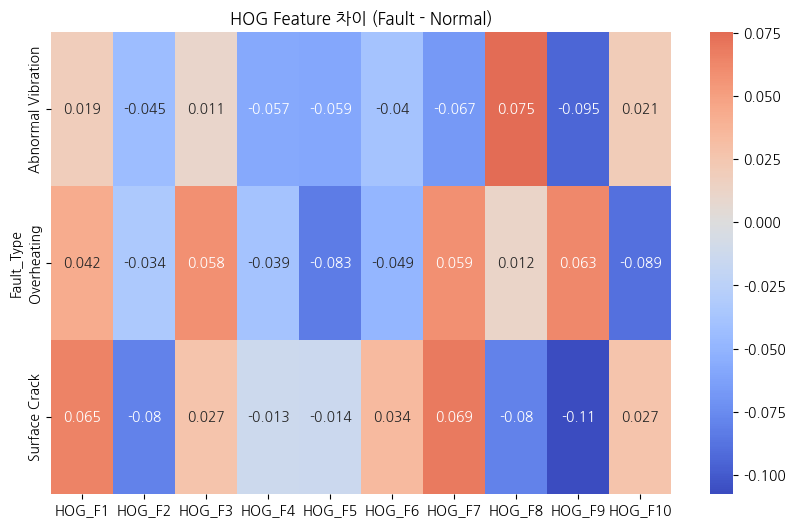

In [ ]:

# 정상값(HOG 평균)
normal = df1.loc['No Fault']

# 다른 고장 타입에서 정상 수치를 뺀 값을 저장
delta_df = df1.drop('No Fault').subtract(normal)
display(delta_df)
# 전치하여 각 hog별 정상에서 벗어난 정도를 바 플롯으로 확인
delta_df.T.plot(kind = 'bar',figsize=(16,6))

plt.figure(figsize=(10,6))
sns.heatmap(delta_df, annot=True, cmap='coolwarm', center=0)
plt.title('HOG Feature 차이 (Fault - Normal)')
plt.show()


### [ 결론 ]
- Abnormal Vibrantion :
    * 진동과 가장 큰 상관관계를 띈다
    * 해당 고장의 경우 HOG_F7,8,9 변형이 크다
- Overheating :
    * 온도와 가장 큰 상관관계
    * 해당 고장의 경우 HOG_F5,9,10 변형이 크다
- Surface Crack	 :
    * 음향과 가장 큰 상관관계
    * 해당 고장의 경우 HOG_F2,7,8,9 변형이 크다

모든 고장과 큰 연관성이 있었던 HOG F_9의 경우 보강이 필요해 보인다.
또한 F_7, F_8번 또한 보강이 필요해 보인다 
즉, F7,8,9가 위치에 가장 큰  개선이 필요해 보인다. 
